<a href="https://colab.research.google.com/github/brempong21/TeslaStockPrediction/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/brempong21/TeslaStockPrediction/main/TSLA.csv', encoding='latin-1')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-04,19.622667,19.933332,19.570000,19.782667,19.782667,71967000
1,2018-06-05,19.846666,19.853333,19.115999,19.408667,19.408667,89928000
2,2018-06-06,20.033333,21.478001,19.832001,21.299999,21.299999,281509500
3,2018-06-07,21.076668,22.000000,20.905333,21.072666,21.072666,215179500
4,2018-06-08,21.266666,21.632000,21.143333,21.177334,21.177334,123078000


In [3]:
ddf = df.drop(columns=['Date'])

In [4]:
ddf.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,144.774741,148.142951,141.104815,144.711838,144.711838,1.365654e+08
std,113.780937,116.343400,110.870937,113.616433,113.616433,8.935184e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.535000,22.975667,22.144334,22.482000,22.482000,7.865250e+07
50%,146.623337,149.626663,142.153336,146.556671,146.556671,1.087440e+08
75%,235.556671,239.885003,231.284996,236.125000,236.125000,1.649475e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [5]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.1 KB


In [6]:
me = ddf['Volume'].astype('float64')

In [7]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.1 KB


In [8]:
ddf.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<ipython-input-9-ce9db9303f5f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Volume',shade=True,color='g',data=sample_ddf)


<Axes: xlabel='Volume', ylabel='Density'>

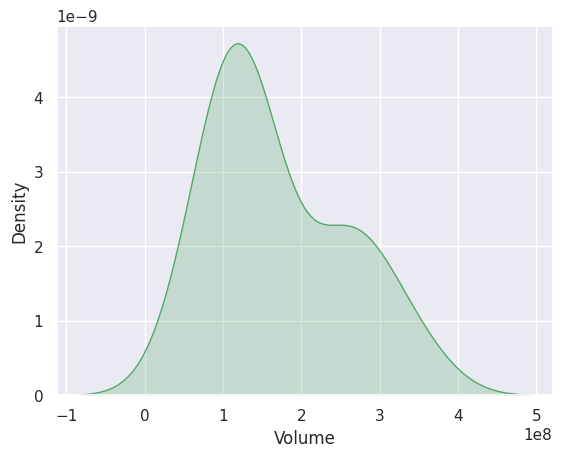

In [9]:
sample_ddf = ddf.sample(n=12, random_state=2)
sns.kdeplot(x='Volume',shade=True,color='g',data=sample_ddf)

<Axes: xlabel='Volume', ylabel='High'>

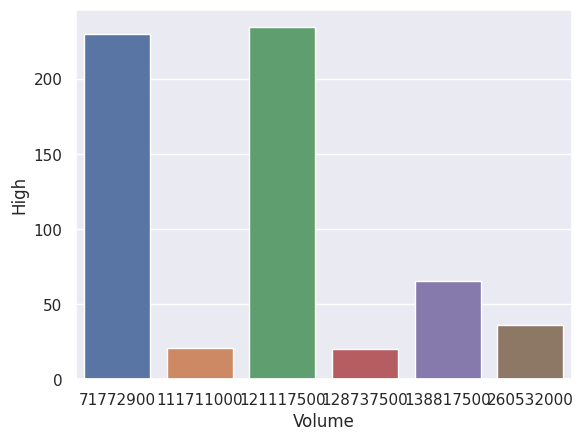

In [10]:
sample_ddf1 = ddf.sample(n=6, random_state=2)
sns.barplot(x='Volume',y='High',data=sample_ddf1)

In [11]:
x = ddf.drop(columns=['High'],axis=1)
y = ddf['High']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
models = {"lin_model":LinearRegression(),
"Random Forest":RandomForestRegressor(n_estimators = 100, random_state=42),
"Decision Tree":DecisionTreeRegressor(),
"KNeighbors":KNeighborsRegressor(),
"ridge":Ridge(alpha=0.5),
"lasso":Lasso(alpha=0.01),
"SVR":SVR(kernel ='rbf')}

In [16]:
for key, value in models.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    print(f"\n{key}")
    print(f"\nR SQUARED: {round(r2, 2)}")
    print(f"\nMEAN ABSOLUTE ERROR: {round(MAE, 2)}")
    print(f"\nMEAN SQUARED ERROR:{round(MAE,2)}")


lin_model

R SQUARED: 1.0

MEAN ABSOLUTE ERROR: 1.35

MEAN SQUARED ERROR:1.35

Random Forest

R SQUARED: 1.0

MEAN ABSOLUTE ERROR: 1.43

MEAN SQUARED ERROR:1.43

Decision Tree

R SQUARED: 1.0

MEAN ABSOLUTE ERROR: 1.84

MEAN SQUARED ERROR:1.84

KNeighbors

R SQUARED: 0.1

MEAN ABSOLUTE ERROR: 88.73

MEAN SQUARED ERROR:88.73

ridge

R SQUARED: 1.0

MEAN ABSOLUTE ERROR: 1.35

MEAN SQUARED ERROR:1.35

lasso

R SQUARED: 1.0

MEAN ABSOLUTE ERROR: 1.52

MEAN SQUARED ERROR:1.52

SVR

R SQUARED: 0.14

MEAN ABSOLUTE ERROR: 91.44

MEAN SQUARED ERROR:91.44


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.56883e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.621e+03, tolerance: 1.181e+03
  model = cd_fast.enet_coordinate_descent(


In [17]:
import statsmodels.api as sm

In [18]:
e = sm.add_constant(x)
result = sm.OLS(y,e).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.811e+05
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:41:30   Log-Likelihood:                -2775.2
No. Observations:                1259   AIC:                             5560.
Df Residuals:                    1254   BIC:                             5586.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1344      0.177     -6.415      0.000      -1.481      -0.787
Open           0.6954      0.015     47.423      0.000       0.667       0.724
Low           -0.2858      0.025    -11.658      0.000      -0.334      -0.238
Close          0.3043      0.008     36.999      0.000       0.288       0.320
Adj Close      0.3043      0.008     36.999      0.000       0.288       0.320
Volume      6.236e-09   8.01e-10      7.781      0.000    4.66e-09    7.81e-09
==============================================================================
Omnibus:                      331.406   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.113
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                       8.512   Cond. No.                     5.74e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""